In [112]:
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/pantchanit/Documents/Pant_Stat_Asign1'

In [113]:
import pandas as pd
import numpy as np
import matplotlib as mpe
import seaborn as sns
%matplotlib inline

In [114]:
country = pd.read_excel('countries_regions.xlsx')
country.head()

,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0


In [115]:
# Removing the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# GET DATA Broadband

In [116]:
broadband1 = pd.read_excel('infrastructure/broadband.xlsx')
broadband1.replace({'..':np.nan},inplace=True)
broadband1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
broadband1 = country.join(broadband1[['2000 [YR2000]', '2014 [YR2014]']])
broadband1

,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
0,Afghanistan,South Asia,1,NaN,0.004495
1,Albania,Eastern Europe,0,NaN,7.180321
2,Algeria,Africa,0,NaN,4.109816
3,American Samoa,Australia and Oceanea,0,NaN,NaN
4,Andorra,Western Europe,0,NaN,36.319796
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,NaN,8.657267
213,West Bank and Gaza,Middle East,0,NaN,5.309577
214,"Yemen, Rep.",Middle East,1,NaN,1.316631
215,Zambia,Africa,1,0.000202,0.133255


<AxesSubplot:>

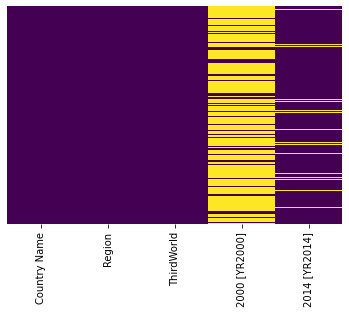

In [118]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [119]:
broadbandRe1 = broadband1[(broadband1["Region"] == "Thailand") |(broadband1["Region"] == "North America") | (broadband1["Region"] == "South America") | (broadband1["Region"] == "Western Asia")]
broadbandRe1 = broadbandRe1.dropna()
broadbandRe1.head()


,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
26,Brazil,South America,0,0.057211,11.820828
35,Canada,North America,0,4.612640,35.239685
40,Chile,South America,0,0.050058,14.019499
42,Colombia,South America,0,0.022387,10.706497
55,Dominica,North America,0,0.114860,15.171977


<AxesSubplot:>

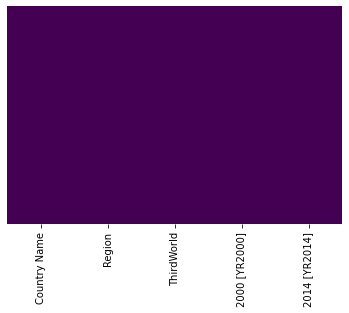

In [120]:
broadband1 = broadband1.dropna()
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [121]:
#2005 with outliers

In [122]:
broadbandRe1.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,5.0,1.453219,2.063312,0.013809,0.015167,0.114860,2.50962,4.612640
South America,6.0,0.025840,0.022980,0.002818,0.007678,0.020438,0.04314,0.057211


In [123]:
#2005 without outliers

In [124]:
broadbandRe1_without_2000 = broadbandRe1[["Country Name","Region","2000 [YR2000]"]]
broadbandRe1_without_2000

,Country Name,Region,2000 [YR2000]
26,Brazil,South America,0.057211
35,Canada,North America,4.612640
40,Chile,South America,0.050058
42,Colombia,South America,0.022387
55,Dominica,North America,0.114860
127,Mexico,North America,0.015167
142,Nicaragua,North America,0.013809
153,Paraguay,South America,0.002818
154,Peru,South America,0.004074
206,United States,North America,2.509620


In [125]:
upper, lower = outliers(broadbandRe1_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
broadbandRe1_without_2000 = broadbandRe1_without_2000[(broadbandRe1_without_2000["2000 [YR2000]"] > lower) & (broadbandRe1_without_2000["2000 [YR2000]"] < upper)]
broadbandRe1_without_2000

Upper whisker:  0.19335766799999998
Lower Whisker:  -0.09283422799999999


,Country Name,Region,2000 [YR2000]
26,Brazil,South America,0.057211
40,Chile,South America,0.050058
42,Colombia,South America,0.022387
55,Dominica,North America,0.114860
127,Mexico,North America,0.015167
142,Nicaragua,North America,0.013809
153,Paraguay,South America,0.002818
154,Peru,South America,0.004074
210,"Venezuela, RB",South America,0.018489


In [126]:
broadbandRe1_without_2000.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,3.0,0.047945,0.057954,0.013809,0.014488,0.015167,0.065013,0.114860
South America,6.0,0.025840,0.022980,0.002818,0.007678,0.020438,0.043140,0.057211


In [127]:
#2015 with outliers

In [128]:
broadbandRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,5.0,18.749317,13.936778,1.813672,10.828387,15.171977,30.692865,35.239685
South America,6.0,8.868881,4.126538,2.805126,6.401585,9.347666,11.542245,14.019499


In [129]:
#2015 without outliers

In [130]:
broadbandRe1_without_2014 = broadbandRe1[["Country Name","Region","2014 [YR2014]"]]
broadbandRe1_without_2014

,Country Name,Region,2014 [YR2014]
26,Brazil,South America,11.820828
35,Canada,North America,35.239685
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
55,Dominica,North America,15.171977
127,Mexico,North America,10.828387
142,Nicaragua,North America,1.813672
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
206,United States,North America,30.692865


In [131]:
upper, lower = outliers(broadbandRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
broadbandRe1_without_2014 = broadbandRe1_without_2014[(broadbandRe1_without_2014["2014 [YR2014]"] > lower) & (broadbandRe1_without_2014["2014 [YR2014]"] < upper)]
broadbandRe1_without_2014

Upper whisker:  26.093342141999997
Lower Whisker:  -4.56693589


,Country Name,Region,2014 [YR2014]
26,Brazil,South America,11.820828
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
55,Dominica,North America,15.171977
127,Mexico,North America,10.828387
142,Nicaragua,North America,1.813672
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
210,"Venezuela, RB",South America,7.988835


In [132]:
broadbandRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,3.0,9.271345,6.813909,1.813672,6.321030,10.828387,13.000182,15.171977
South America,6.0,8.868881,4.126538,2.805126,6.401585,9.347666,11.542245,14.019499


# GET DATA Electricity

In [133]:
electricity1 = pd.read_excel('infrastructure/electricity.xlsx')
electricity1.replace({'..':np.nan},inplace=True)
electricity1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,550.971960,559.917891,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
electricity1 = country.join(electricity1[['2000 [YR2000]', '2014 [YR2014]']])
electricity1

,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
0,Afghanistan,South Asia,1,NaN,NaN
1,Albania,Eastern Europe,0,1449.647413,2309.366503
2,Algeria,Africa,0,683.294806,1362.871884
3,American Samoa,Australia and Oceanea,0,NaN,NaN
4,Andorra,Western Europe,0,NaN,NaN
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,NaN,NaN
213,West Bank and Gaza,Middle East,0,NaN,NaN
214,"Yemen, Rep.",Middle East,1,142.741678,219.799897
215,Zambia,Africa,1,597.545570,717.347305


<AxesSubplot:>

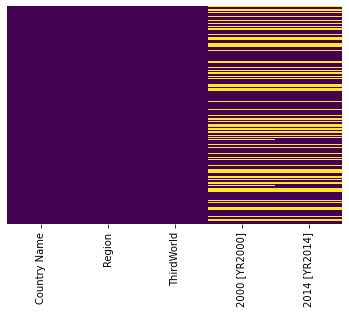

In [135]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [136]:
electricityRe1 = electricity1[(electricity1["Region"] == "Thailand") |(electricity1["Region"] == "North America") | (electricity1["Region"] == "South America") | (electricity1["Region"] == "Western Asia")]
electricityRe1 = electricityRe1.dropna()
electricityRe1


,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
7,Argentina,South America,0,2088.807630,3074.702071
8,Armenia,Western Asia,0,1297.564469,1961.610395
12,Azerbaijan,Western Asia,0,2040.479090,2202.393918
23,Bolivia,South America,0,415.881173,742.538400
26,Brazil,South America,0,1897.353148,2619.960499
35,Canada,North America,0,17037.072281,15588.487146
40,Chile,South America,0,2499.291178,3879.673420
42,Colombia,South America,0,845.597517,1312.199493
46,Costa Rica,North America,0,1506.926791,1942.490600
49,Cuba,North America,0,1137.921864,1450.882819


In [137]:
#2005 with outliers

In [138]:
electricityRe1.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,15.0,3541.644471,5170.806765,35.799514,551.694174,1327.774654,3134.763273,17037.072281
South America,11.0,1536.045517,845.412438,415.881173,755.887143,1897.353148,2177.234895,2667.609220
Thailand,1.0,1448.072733,NaN,1448.072733,1448.072733,1448.072733,1448.072733,1448.072733
Western Asia,8.0,1926.525363,568.486670,1297.564469,1662.715998,1738.260972,2070.750600,3169.523341


In [139]:
#2005 without outliers

In [140]:
electricityRe1_without_2000 = electricityRe1[["Country Name","Region","2000 [YR2000]"]]
electricityRe1_without_2000

,Country Name,Region,2000 [YR2000]
7,Argentina,South America,2088.807630
8,Armenia,Western Asia,1297.564469
12,Azerbaijan,Western Asia,2040.479090
23,Bolivia,South America,415.881173
26,Brazil,South America,1897.353148
35,Canada,North America,17037.072281
40,Chile,South America,2499.291178
42,Colombia,South America,845.597517
46,Costa Rica,North America,1506.926791
49,Cuba,North America,1137.921864


In [141]:
upper, lower = outliers(electricityRe1_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
electricityRe1_without_2000 = electricityRe1_without_2000[(electricityRe1_without_2000["2000 [YR2000]"] > lower) & (electricityRe1_without_2000["2000 [YR2000]"] < upper)]
electricityRe1_without_2000

Upper whisker:  4236.795194617976
Lower Whisker:  -1158.355605798443


,Country Name,Region,2000 [YR2000]
7,Argentina,South America,2088.807630
8,Armenia,Western Asia,1297.564469
12,Azerbaijan,Western Asia,2040.479090
23,Bolivia,South America,415.881173
26,Brazil,South America,1897.353148
40,Chile,South America,2499.291178
42,Colombia,South America,845.597517
46,Costa Rica,North America,1506.926791
49,Cuba,North America,1137.921864
56,Dominican Republic,North America,1327.774654


In [142]:
electricityRe1_without_2000.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,12.0,1260.445250,1090.634670,35.799514,452.506089,1202.224669,1580.312077,3993.184754
South America,11.0,1536.045517,845.412438,415.881173,755.887143,1897.353148,2177.234895,2667.609220
Thailand,1.0,1448.072733,NaN,1448.072733,1448.072733,1448.072733,1448.072733,1448.072733
Western Asia,8.0,1926.525363,568.486670,1297.564469,1662.715998,1738.260972,2070.750600,3169.523341


In [143]:
#2014 with outliers

In [144]:
electricityRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,15.0,3567.978326,4740.932035,39.055809,778.455780,1615.514607,3477.497112,15588.487146
South America,11.0,2300.436787,1067.492999,742.538400,1361.136320,2619.960499,3079.945977,3879.673420
Thailand,1.0,2538.795713,NaN,2538.795713,2538.795713,2538.795713,2538.795713,2538.795713
Western Asia,8.0,2527.887558,1314.567685,1499.485994,1867.276781,2082.002157,2682.567295,5600.208465


In [145]:
#2014 without outliers

In [146]:
electricityRe1_without_2014 = electricityRe1[["Country Name","Region","2014 [YR2014]"]]
electricityRe1_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
35,Canada,North America,15588.487146
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819


In [147]:
upper, lower = outliers(electricityRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
electricityRe1_without_2014 = electricityRe1_without_2014[(electricityRe1_without_2014["2014 [YR2014]"] > lower) & (electricityRe1_without_2014["2014 [YR2014]"] < upper)]
electricityRe1_without_2014

Upper whisker:  5200.596044029782
Lower Whisker:  -942.5395140629485


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436


In [148]:
electricityRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,12.0,1487.021960,1240.901608,39.055809,615.175248,1250.807679,1972.912429,4797.670436
South America,11.0,2300.436787,1067.492999,742.538400,1361.136320,2619.960499,3079.945977,3879.673420
Thailand,1.0,2538.795713,NaN,2538.795713,2538.795713,2538.795713,2538.795713,2538.795713
Western Asia,7.0,2088.984572,467.085078,1499.485994,1793.331731,1961.610395,2440.579696,2693.972760


# GET DATA Mobile

In [149]:
mobile1 = pd.read_excel('infrastructure/mobile.xlsx')
mobile1.replace({'..':np.nan},inplace=True)
mobile1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,0.004778,0.016312,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,2.303484,2.351348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,1.250858,4.424432,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
mobile1 = country.join(mobile1[['2000 [YR2000]', '2014 [YR2014]']])
mobile1

,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
0,Afghanistan,South Asia,1,0.000000,55.159515
1,Albania,Eastern Europe,0,0.952019,115.997935
2,Algeria,Africa,0,0.277042,111.238610
3,American Samoa,Australia and Oceanea,0,3.445115,NaN
4,Andorra,Western Europe,0,36.003976,83.623900
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,32.192197,NaN
213,West Bank and Gaza,Middle East,0,0.219479,72.201640
214,"Yemen, Rep.",Middle East,1,0.184053,66.218793
215,Zambia,Africa,1,0.949055,65.681859


<AxesSubplot:>

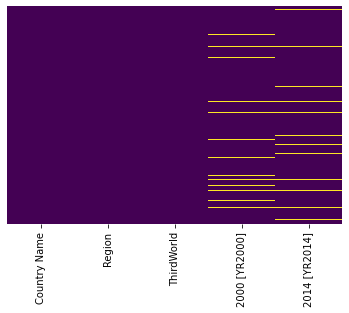

In [151]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [152]:
mobileRe1 = mobile1[(mobile1["Region"] == "Thailand") |(mobile1["Region"] == "North America") | (mobile1["Region"] == "South America") | (mobile1["Region"] == "Western Asia")]
mobileRe1 = mobileRe1.dropna()
mobileRe1

,Country Name,Region,ThirdWorld,2000 [YR2000],2014 [YR2014]
6,Antigua and Barbuda,North America,0,28.941276,129.687129
7,Argentina,South America,0,17.596451,143.615832
8,Armenia,Western Asia,0,0.569652,118.772363
9,Aruba,North America,0,16.510187,134.619461
12,Azerbaijan,Western Asia,0,5.175593,111.013461
13,"Bahamas, The",North America,0,10.576713,84.947104
16,Barbados,North America,0,10.484504,107.243019
19,Belize,North America,0,6.797808,48.759643
21,Bermuda,North America,0,19.996308,92.906782
23,Bolivia,South America,0,6.920904,97.607289


In [153]:
#2005 with outliers

In [154]:
mobileRe1.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,27.0,12.118829,11.030418,0.058743,2.542203,10.484504,15.372334,38.861836
South America,12.0,11.552137,6.714889,3.802605,5.604520,10.545052,15.963724,22.516004
Thailand,1.0,4.854443,NaN,4.854443,4.854443,4.854443,4.854443,4.854443
Western Asia,8.0,1.514226,2.089211,0.018660,0.178693,0.392069,2.107683,5.175593


In [155]:
#2005 without outliers

In [156]:
mobileRe1_without_2000 = mobileRe1[["Country Name","Region","2000 [YR2000]"]]
mobileRe1_without_2000

,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,28.941276
7,Argentina,South America,17.596451
8,Armenia,Western Asia,0.569652
9,Aruba,North America,16.510187
12,Azerbaijan,Western Asia,5.175593
13,"Bahamas, The",North America,10.576713
16,Barbados,North America,10.484504
19,Belize,North America,6.797808
21,Bermuda,North America,19.996308
23,Bolivia,South America,6.920904


In [157]:
upper, lower = outliers(mobileRe1_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
mobileRe1_without_2000 = mobileRe1_without_2000[(mobileRe1_without_2000["2000 [YR2000]"] > lower) & (mobileRe1_without_2000["2000 [YR2000]"] < upper)]
mobileRe1_without_2000

Upper whisker:  31.33579781025
Lower Whisker:  -15.091226863750002


,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,28.941276
7,Argentina,South America,17.596451
8,Armenia,Western Asia,0.569652
9,Aruba,North America,16.510187
12,Azerbaijan,Western Asia,5.175593
13,"Bahamas, The",North America,10.576713
16,Barbados,North America,10.484504
19,Belize,North America,6.797808
21,Bermuda,North America,19.996308
23,Bolivia,South America,6.920904


In [158]:
mobileRe1_without_2000.groupby("Region")['2000 [YR2000]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,25.0,10.096835,8.610209,0.058743,2.361712,8.327284,13.822724,28.941276
South America,12.0,11.552137,6.714889,3.802605,5.604520,10.545052,15.963724,22.516004
Thailand,1.0,4.854443,NaN,4.854443,4.854443,4.854443,4.854443,4.854443
Western Asia,8.0,1.514226,2.089211,0.018660,0.178693,0.392069,2.107683,5.175593


In [159]:
#2014 with outliers

In [160]:
mobileRe1.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,27.0,106.154315,33.108446,22.382360,86.729452,105.654918,128.852703,177.019589
South America,12.0,121.399485,27.856611,74.262490,103.478030,114.249459,139.742345,167.692983
Thailand,1.0,141.872851,NaN,141.872851,141.872851,141.872851,141.872851,141.872851
Western Asia,8.0,119.771752,27.960730,71.119845,107.491472,124.091482,132.329718,165.267504


In [161]:
#2014 without outliers

In [162]:
mobileRe1_without_2014 = mobileRe1[["Country Name","Region","2014 [YR2014]"]]
mobileRe1_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
7,Argentina,South America,143.615832
8,Armenia,Western Asia,118.772363
9,Aruba,North America,134.619461
12,Azerbaijan,Western Asia,111.013461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
23,Bolivia,South America,97.607289


In [163]:
upper, lower = outliers(mobileRe1_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
mobileRe1_without_2014 = mobileRe1_without_2014[(mobileRe1_without_2014["2014 [YR2014]"] > lower) & (mobileRe1_without_2014["2014 [YR2014]"] < upper)]
mobileRe1_without_2014

Upper whisker:  191.20015395250005
Lower Whisker:  38.75471361249998


,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
7,Argentina,South America,143.615832
8,Armenia,Western Asia,118.772363
9,Aruba,North America,134.619461
12,Azerbaijan,Western Asia,111.013461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
23,Bolivia,South America,97.607289


In [164]:
mobileRe1_without_2014.groupby("Region")['2014 [YR2014]'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,26.0,109.376313,29.129192,48.759643,88.625865,105.931649,129.269916,177.019589
South America,12.0,121.399485,27.856611,74.262490,103.478030,114.249459,139.742345,167.692983
Thailand,1.0,141.872851,NaN,141.872851,141.872851,141.872851,141.872851,141.872851
Western Asia,8.0,119.771752,27.960730,71.119845,107.491472,124.091482,132.329718,165.267504
